In [51]:
#IMPORTS
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
#Read in Excel File
ddData = pd.read_excel('/Users/meme/Documents/DoorDash/DoorDashData.xlsx', dtype={
    'DELIVERY_UUID':'string',
    'DELIV_CREATED_AT' : 'datetime64[ns]',
    'DELIV_STORE_NAME' : 'string',
    'DELIV_DASHER_ID': 'string',
    'DELIV_D2R' : 'float64',
    'DELIV_IS_20_MIN_LATE': 'int64',
    'DELIV_CLAT' : 'float64',
    'DELIV_CANCELLED_AT': 'datetime64[ns]',
    'DELIV_MISSING_INCORRECT_REPORT' : 'string',
    'WAS_REQUESTED' : 'int64',
    'WAS_MISSING' : 'int64',
    'WAS_SUBBED' : 'int64',
    'WAS_FOUND' : 'int64',
    'ITEM_NAME' : 'string',
    'ITEM_PRICE' : 'float64',
    'ITEM_CATEGORY' : 'string',
    'SUBSTITUTE_ITEM_NAME' : 'string',
    'SUBSTITUTE_ITEM_CATEGORY' : 'string'})
#Check Data Types
ddData.dtypes

DELIVERY_UUID                             string
DELIV_CREATED_AT                  datetime64[ns]
DELIV_STORE_NAME                          string
DELIV_DASHER_ID                           string
DELIV_SUBMARKET                           object
DELIV_D2R                                float64
DELIV_IS_20_MIN_LATE                       int64
DELIV_CLAT                               float64
DELIV_CANCELLED_AT                datetime64[ns]
DELIV_MISSING_INCORRECT_REPORT            string
WAS_REQUESTED                              int64
WAS_MISSING                                int64
WAS_SUBBED                                 int64
WAS_FOUND                                  int64
ITEM_NAME                                 string
ITEM_PRICE                               float64
ITEM_CATEGORY                             string
SUBSTITUTE_ITEM_NAME                      string
SUBSTITUTE_ITEM_CATEGORY                  string
dtype: object

In [50]:
#check to make sure all duplicates were dropped
ddData.drop_duplicates()
ddData.shape

(60580, 19)

In [58]:
ddData.head(5)

,DELIVERY_UUID,DELIV_CREATED_AT,DELIV_STORE_NAME,DELIV_DASHER_ID,DELIV_SUBMARKET,DELIV_D2R,DELIV_IS_20_MIN_LATE,DELIV_CLAT,DELIV_CANCELLED_AT,DELIV_MISSING_INCORRECT_REPORT,WAS_REQUESTED,WAS_MISSING,WAS_SUBBED,WAS_FOUND,ITEM_NAME,ITEM_PRICE,ITEM_CATEGORY,SUBSTITUTE_ITEM_NAME,SUBSTITUTE_ITEM_CATEGORY
0,9140e853-ea67-4eee-ba76-85fafcc7da6d,2022-10-14 23:59:09,Grocery1,16990594,Cincinnati,0.083333,0,0.366667,NaT,False,1,0,0,1,Cupcake Pinot Grigio (750 ml),8.99,Alcohol,,
1,9140e853-ea67-4eee-ba76-85fafcc7da6d,2022-10-14 23:59:09,Grocery1,16990594,Cincinnati,0.083333,0,0.366667,NaT,False,1,0,0,1,Meijer Tomato Paste No Salt Added (6 oz),0.90,Pantry,,
2,9140e853-ea67-4eee-ba76-85fafcc7da6d,2022-10-14 23:59:09,Grocery1,16990594,Cincinnati,0.083333,0,0.366667,NaT,False,1,0,0,1,Pillsbury Ready To Bake! Cookie Dough Chocolat...,4.25,Bakery,,
3,9140e853-ea67-4eee-ba76-85fafcc7da6d,2022-10-14 23:59:09,Grocery1,16990594,Cincinnati,0.083333,0,0.366667,NaT,False,1,0,0,1,Meijer Ultra Pasteurized Heavy Whipping Cream ...,4.05,Dairy & Eggs,,
4,9140e853-ea67-4eee-ba76-85fafcc7da6d,2022-10-14 23:59:09,Grocery1,16990594,Cincinnati,0.083333,0,0.366667,NaT,False,1,0,0,1,Maruchan Chicken Flavor Ramen Noodle Soup Box ...,3.95,Pantry,,


In [54]:
ddData.describe()

,DELIV_IS_20_MIN_LATE,WAS_REQUESTED,WAS_MISSING,WAS_SUBBED,WAS_FOUND,ITEM_PRICE
count,60580.000000,60580.0,60580.000000,60580.000000,60580.000000,60580.000000
mean,0.047425,1.0,0.062479,0.042704,0.932403,4.969372
std,0.212548,0.0,0.242026,0.202190,0.251054,4.209435
min,0.000000,1.0,0.000000,0.000000,0.000000,0.290000
25%,0.000000,1.0,0.000000,0.000000,1.000000,2.590000
50%,0.000000,1.0,0.000000,0.000000,1.000000,3.990000
75%,0.000000,1.0,0.000000,0.000000,1.000000,5.990000
max,1.000000,1.0,1.000000,1.000000,1.000000,160.950000


In [62]:
#count all unique vals in all cols
ddData.nunique()

DELIVERY_UUID                     13085
DELIV_CREATED_AT                  13029
DELIV_STORE_NAME                      4
DELIV_DASHER_ID                    2329
DELIV_SUBMARKET                       1
DELIV_D2R                          1138
DELIV_IS_20_MIN_LATE                  2
DELIV_CLAT                         1523
DELIV_CANCELLED_AT                  204
DELIV_MISSING_INCORRECT_REPORT        2
WAS_REQUESTED                         1
WAS_MISSING                           2
WAS_SUBBED                            2
WAS_FOUND                             2
ITEM_NAME                         13275
ITEM_PRICE                          556
ITEM_CATEGORY                        27
SUBSTITUTE_ITEM_NAME               2090
SUBSTITUTE_ITEM_CATEGORY             25
dtype: int64

In [309]:
ddData.corr()

/var/folders/9j/vsl4xffj0sjgg2km50q0qffr0000gn/T/ipykernel_29405/1187087413.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,DELIV_D2R,DELIV_IS_20_MIN_LATE,DELIV_CLAT,WAS_REQUESTED,WAS_MISSING,WAS_SUBBED,WAS_FOUND,ITEM_PRICE
DELIV_D2R,1.000000,0.079018,0.039345,NaN,0.032150,0.027015,-0.031984,0.008392
DELIV_IS_20_MIN_LATE,0.079018,1.000000,0.421569,NaN,0.003047,-0.002569,0.000991,0.015290
DELIV_CLAT,0.039345,0.421569,1.000000,NaN,0.003455,0.002506,-0.003060,-0.008111
WAS_REQUESTED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WAS_MISSING,0.032150,0.003047,0.003455,NaN,1.000000,0.818149,-0.958777,0.043580
WAS_SUBBED,0.027015,-0.002569,0.002506,NaN,0.818149,1.000000,-0.784422,0.038169
WAS_FOUND,-0.031984,0.000991,-0.003060,NaN,-0.958777,-0.784422,1.000000,-0.043288
ITEM_PRICE,0.008392,0.015290,-0.008111,NaN,0.043580,0.038169,-0.043288,1.000000


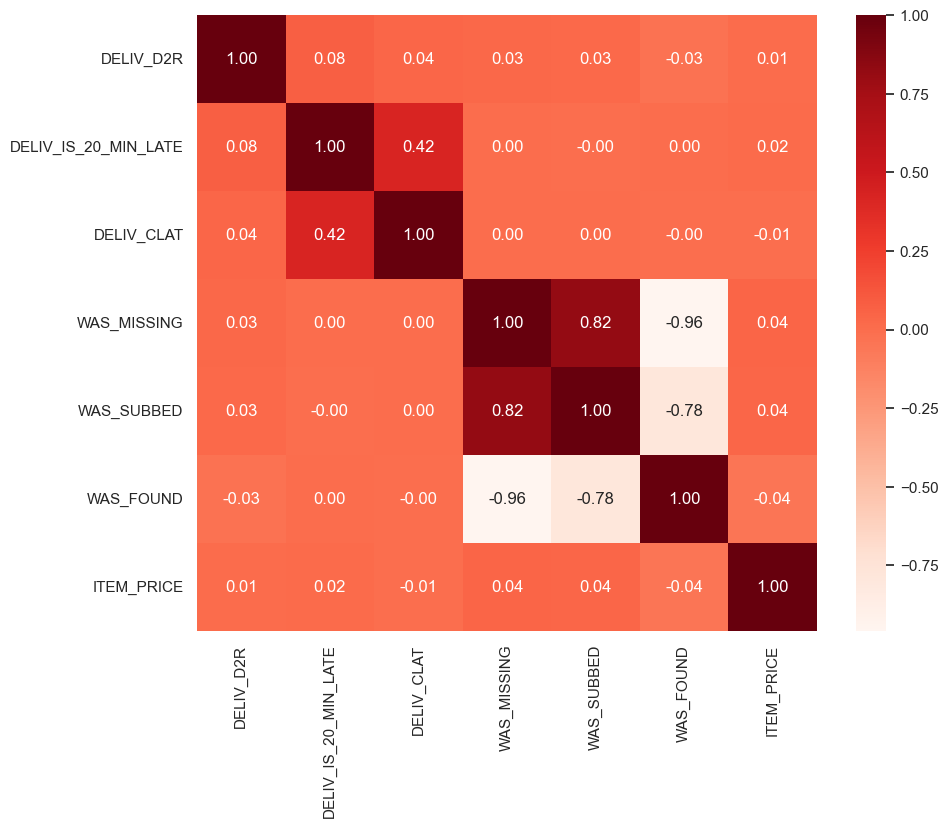

In [269]:
#cmap = sns.light_palette("#FF5252", as_cmap=True)
#plt.figure(figsize=(8, 8))
#sns.set(font_scale=1)  
#corr_matrix = df.corr()

# Create a heatmap of the correlation matrix with a red colormap
#plt.figure(figsize=(10, 8))
#sns.heatmap(corr_matrix, cmap='Reds', annot=True, fmt=".2f")

#sns.heatmap(ddData.corr(),annot=True, cmap="Reds", fmt=".2f")
#plt.show() 
ddData_corr = ddData[['DELIV_D2R','DELIV_IS_20_MIN_LATE','DELIV_CLAT','WAS_MISSING','WAS_SUBBED','WAS_FOUND','ITEM_PRICE']]
corr_matrix = ddData_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='Reds', annot=True, fmt=".2f")
plt.show() 

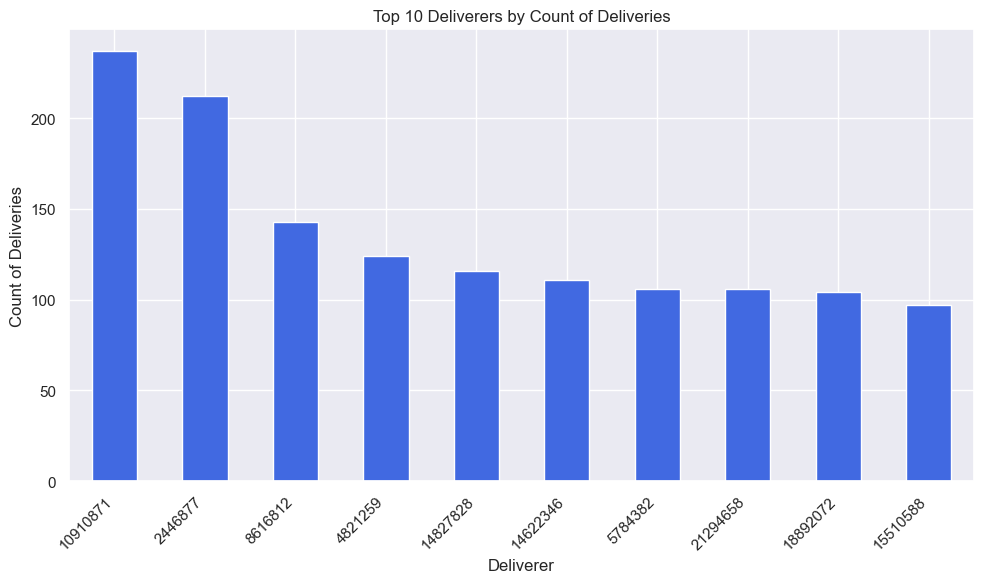

In [310]:
deliverer_counts = ddData.groupby('DELIV_DASHER_ID')['DELIVERY_UUID'].nunique()

# Sort the deliverer counts in descending order and select the top 10
top_10_deliverers = deliverer_counts.sort_values(ascending=False).head(10)

# Create a bar chart to visualize the counts of deliveries per deliverer
plt.figure(figsize=(10, 6))
top_10_deliverers.plot(kind='bar', color='royalblue')

# Customize the plot
plt.title('Top 10 Deliverers by Count of Deliveries')
plt.xlabel('Deliverer')
plt.ylabel('Count of Deliveries')
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

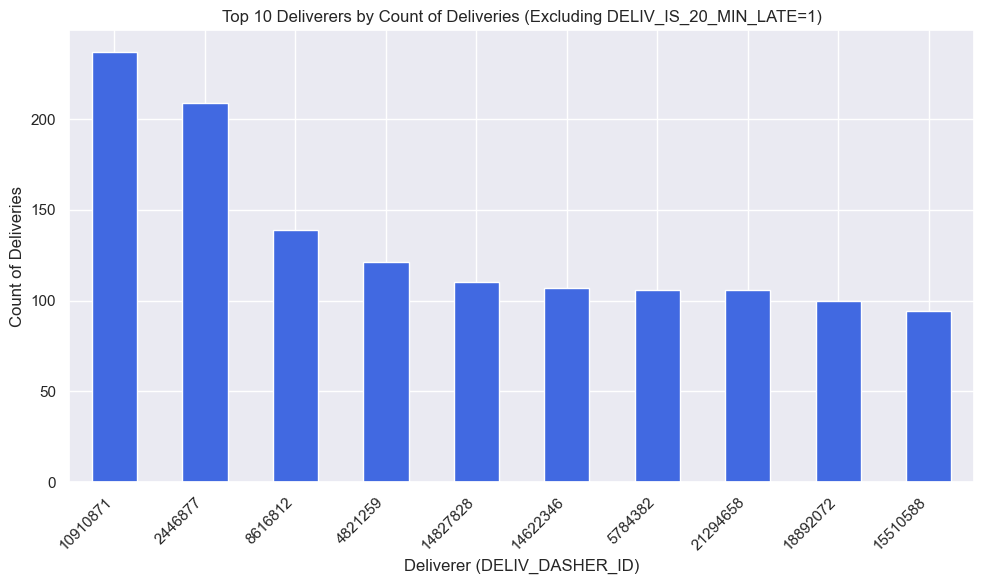

In [271]:
# Filter out deliveries with 'DELIV_IS_20_MIN_LATE' equal to 1
filtered_data = ddData[ddData['DELIV_IS_20_MIN_LATE'] != 1]

# Group by 'DELIV_DASHER_ID' and count the number of unique 'DELIVERY_UUID' for each deliverer
deliverer_counts = filtered_data.groupby('DELIV_DASHER_ID')['DELIVERY_UUID'].nunique()

# Sort the deliverer counts in descending order and select the top 10
top_10_deliverers = deliverer_counts.sort_values(ascending=False).head(10)

# Create a bar chart to visualize the counts of deliveries per deliverer
plt.figure(figsize=(10, 6))
top_10_deliverers.plot(kind='bar', color='royalblue')

# Customize the plot
plt.title('Top 10 Deliverers by Count of Deliveries (Excluding DELIV_IS_20_MIN_LATE=1)')
plt.xlabel('Deliverer (DELIV_DASHER_ID)')
plt.ylabel('Count of Deliveries')
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

In [274]:
#Deliv_D2R Ranked by store
# Group by 'DELIV_STORE_NAME' and calculate the average pick-up time for each store
store_avg_pickup_time = ddData.groupby('DELIV_STORE_NAME')['DELIV_D2R'].mean()

# Sort the stores by the average pick-up time in descending order
ranked_stores = store_avg_pickup_time.sort_values(ascending=False)

# Convert the result to a DataFrame for better visualization
ranked_stores_df = ranked_stores.reset_index()

# Display the ranked stores
print(ranked_stores_df)

  DELIV_STORE_NAME  DELIV_D2R
0         Grocery2   8.134489
1         Grocery3   7.374725
2         Grocery1   4.789433
3        DashMart1   2.905169


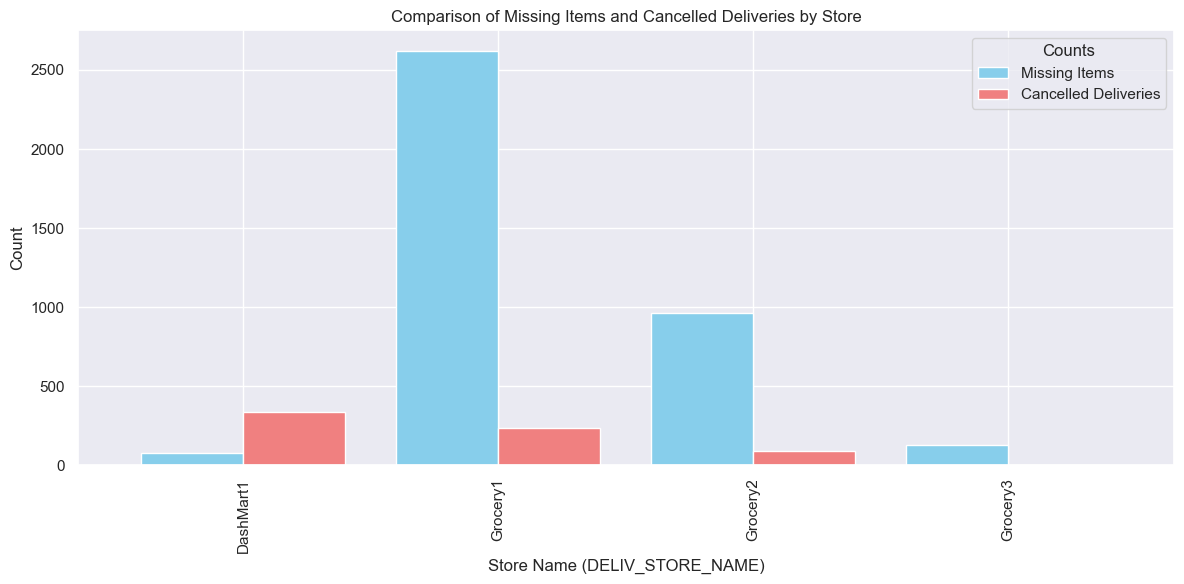

In [283]:
# Filter rows where 'WAS_MISSING' is equal to 1
missing_items = ddData[ddData['WAS_MISSING'] == 1]

# Group by 'DELIV_STORE_NAME' and count the number of missing items and cancelled deliveries for each store
store_missing_counts = missing_items.groupby('DELIV_STORE_NAME')['DELIVERY_UUID'].count()
store_cancelled_counts = ddData.groupby('DELIV_STORE_NAME')['DELIV_CANCELLED_AT'].count()

# Get unique store names
store_names = store_missing_counts.index

# Create a DataFrame to store the counts
comparison_df = pd.DataFrame({'Missing Items': store_missing_counts, 'Cancelled Deliveries': store_cancelled_counts}, index=store_names)

# Plot the comparison as a grouped bar chart
ax = comparison_df.plot(kind='bar', figsize=(12, 6), width=0.8, color=['skyblue', 'lightcoral'])

# Customize the plot
plt.title('Comparison of Missing Items and Cancelled Deliveries by Store')
plt.xlabel('Store Name (DELIV_STORE_NAME)')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Counts', loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()

In [280]:
#TOTAL SUBS by delivery and store
# Filter rows where 'WAS_SUBBED' is equal to 1
substituted_items = ddData[ddData['WAS_SUBBED'] == 1]

# Group by 'DELIV_STORE_NAME' and count the number of 'DELIVERY_UUID' where 'WAS_SUBBED' = 1 for each store
store_substituted_counts = substituted_items.groupby('DELIV_STORE_NAME')['DELIVERY_UUID'].count()

# Display the total count of delivery IDs with 'WAS_SUBBED' = 1 per store
print(store_substituted_counts)

DELIV_STORE_NAME
DashMart1      38
Grocery1     1816
Grocery2      657
Grocery3       76
Name: DELIVERY_UUID, dtype: int64


In [302]:
#Total missing by delivery and store
# Filter rows where 'WAS_MISSING' is equal to 1
missing_items = ddData[ddData['WAS_MISSING'] == 1]

# Group by 'DELIV_STORE_NAME' and count the number of delivery IDs with 'WAS_MISSING' = 1 per store
missing_items_counts = missing_items.groupby('DELIV_STORE_NAME')['DELIVERY_UUID'].count().reset_index()

# Rename the column to indicate the count
missing_items_counts.rename(columns={'DELIVERY_UUID': 'Count of Missing Items'}, inplace=True)

# Display the DataFrame with counts per store
print(missing_items_counts)

  DELIV_STORE_NAME  Count of Missing Items
0        DashMart1                      78
1         Grocery1                    2619
2         Grocery2                     962
3         Grocery3                     126


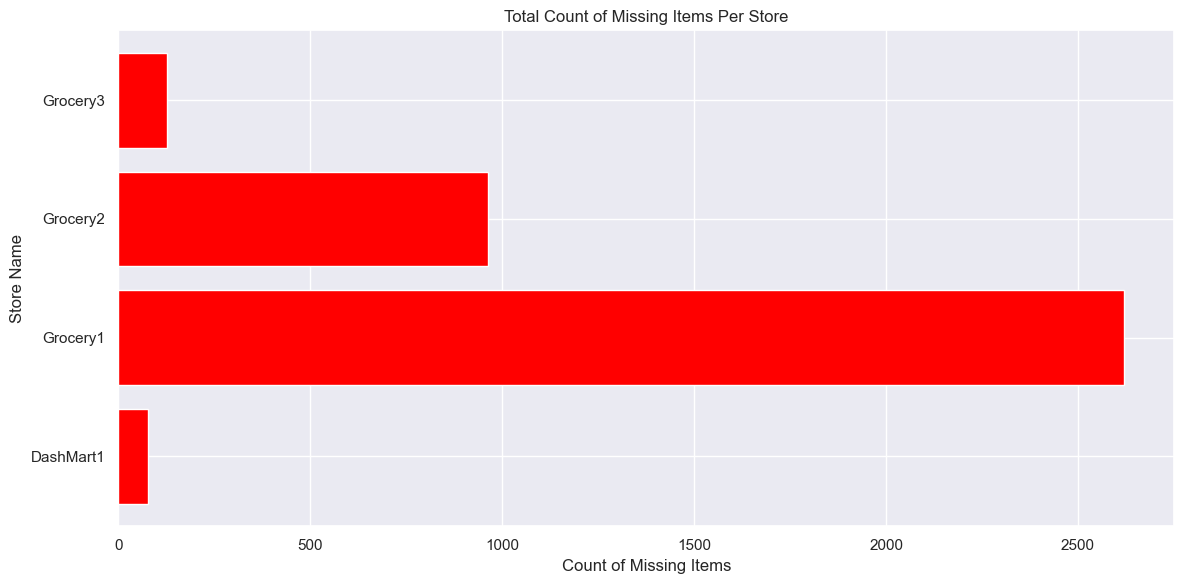

In [308]:
# Filter rows where 'WAS_MISSING' is equal to 1
missing_items = ddData[ddData['WAS_MISSING'] == 1]

# Group by 'DELIV_STORE_NAME' and count the number of delivery IDs with 'WAS_MISSING' = 1 per store
missing_items_counts = missing_items.groupby('DELIV_STORE_NAME')['DELIVERY_UUID'].count().reset_index()

# Rename the column to indicate the count
missing_items_counts.rename(columns={'DELIVERY_UUID': 'Count of Missing Deliveries'}, inplace=True)

# Create a bar chart to visualize the counts
plt.figure(figsize=(12, 6))
plt.barh(missing_items_counts['DELIV_STORE_NAME'], missing_items_counts['Count of Missing Deliveries'], color='red')
plt.xlabel('Count of Missing Items')
plt.ylabel('Store Name')
plt.title('Total Count of Missing Items Per Store')

# Display the plot
plt.tight_layout()
plt.show()

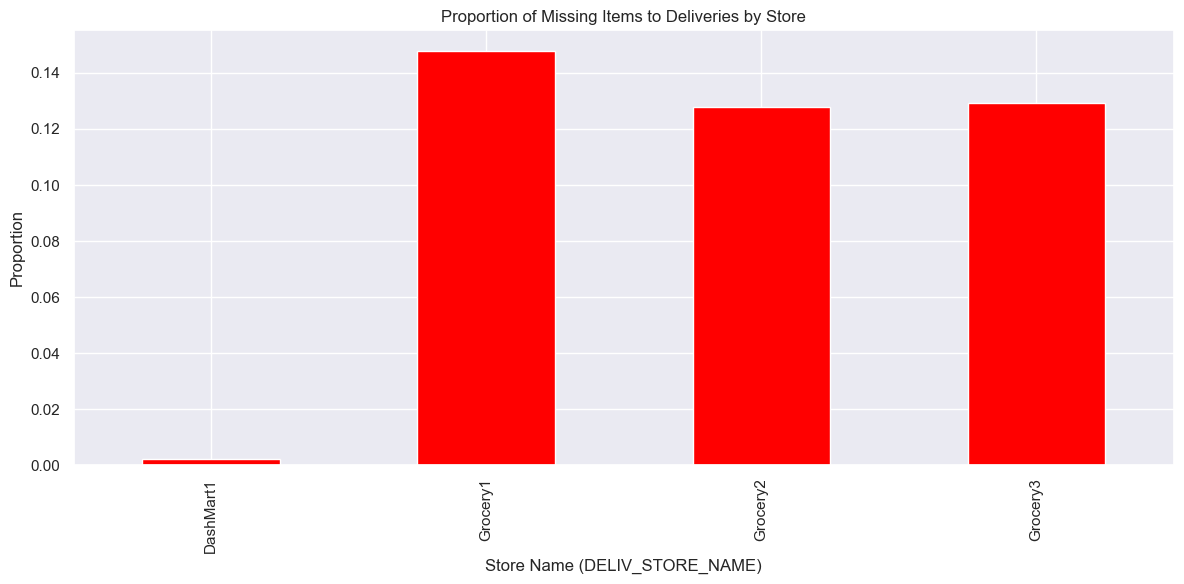

In [301]:
# Filter rows where 'WAS_MISSING' is equal to 1
missing_items = ddData[ddData['WAS_MISSING'] == 1]

# Group by 'DELIV_STORE_NAME' and count the number of rows with 'WAS_MISSING' equal to 1 and deliveries for each store
store_missing_counts = missing_items.groupby('DELIV_STORE_NAME')['DELIVERY_UUID'].count()
store_delivery_counts = ddData.groupby('DELIV_STORE_NAME')['DELIVERY_UUID'].count()

# Calculate the proportion of rows with 'WAS_MISSING' = 1 to deliveries
proportion = store_missing_counts / store_delivery_counts

# Create a bar chart to visualize the proportions
plt.figure(figsize=(12, 6))
proportion.plot(kind='bar', color='red')

# Customize the plot
plt.title('Proportion of Missing Items to Deliveries by Store')
plt.xlabel('Store Name (DELIV_STORE_NAME)')
plt.ylabel('Proportion')
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()

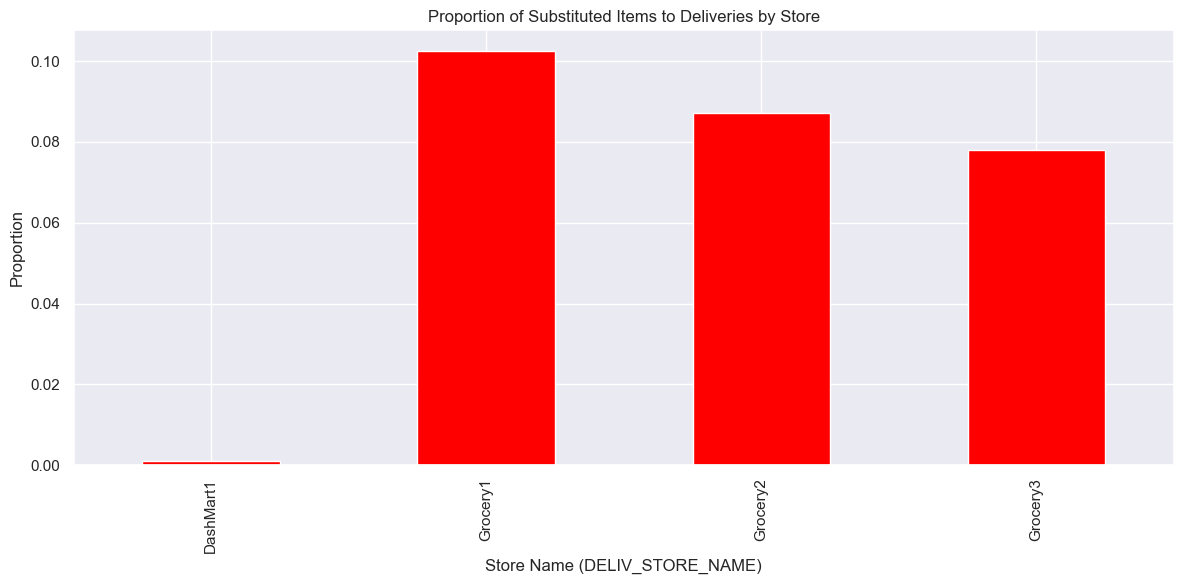

In [299]:
# Filter rows where 'WAS_SUBBED' is equal to 1
substituted_items = ddData[ddData['WAS_SUBBED'] == 1]

# Group by 'DELIV_STORE_NAME' and count the number of rows with 'WAS_SUBBED' equal to 1 and deliveries for each store
store_substituted_counts = substituted_items.groupby('DELIV_STORE_NAME')['DELIVERY_UUID'].count()
store_delivery_counts = ddData.groupby('DELIV_STORE_NAME')['DELIVERY_UUID'].count()

# Calculate the proportion of rows with 'WAS_SUBBED' = 1 to deliveries
proportion = store_substituted_counts / store_delivery_counts

# Create a bar chart to visualize the proportions
plt.figure(figsize=(12, 6))
proportion.plot(kind='bar', color='red')

# Customize the plot
plt.title('Proportion of Substituted Items to Deliveries by Store')
plt.xlabel('Store Name (DELIV_STORE_NAME)')
plt.ylabel('Proportion')
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()

In [88]:
#late orders vs total orders
ddDatalate = ddData[ddData['DELIV_IS_20_MIN_LATE']==1]
percent_late = (len(ddDatalate)/len(ddData))*100
percent_late

4.742489270386266

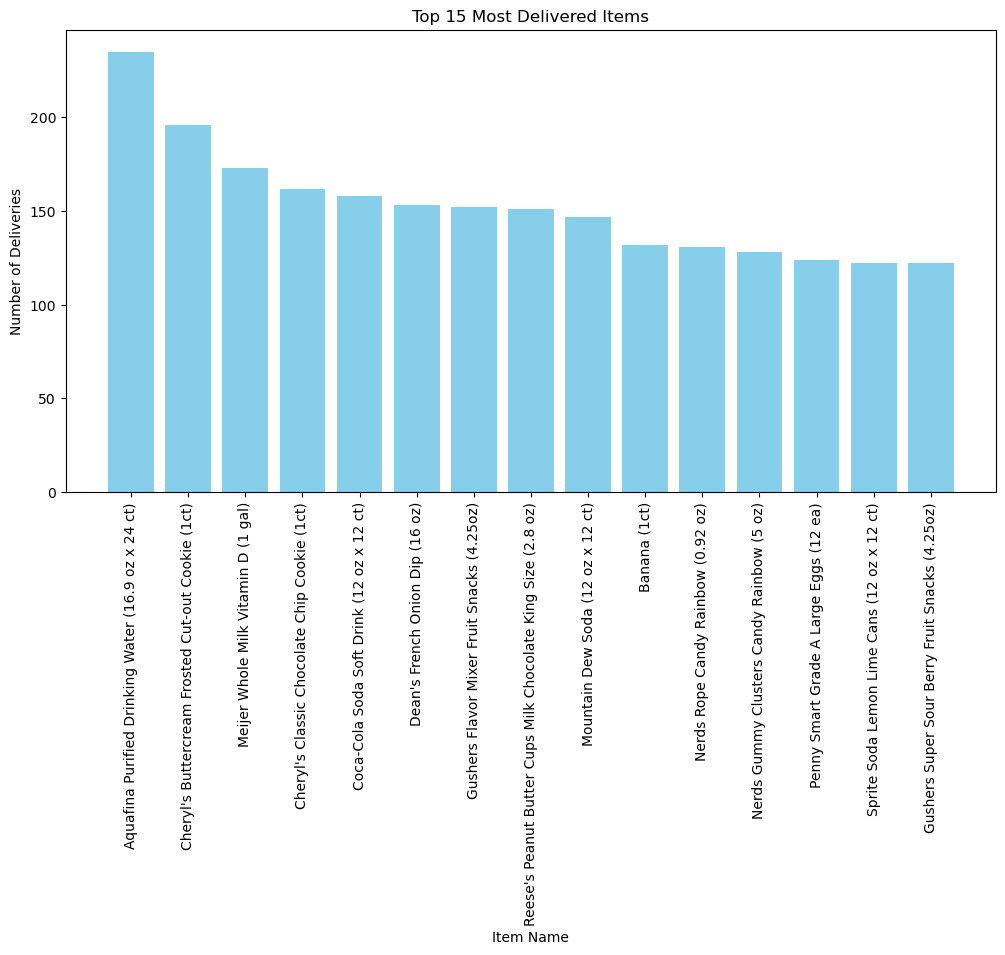

In [168]:
# Group the data by 'ITEM_NAME' and count the number of deliveries for each item
item_delivery_counts = ddData['ITEM_NAME'].value_counts().reset_index()
item_delivery_counts.columns = ['ITEM_NAME', 'Delivery_Count']

# Sort the items by the number of deliveries in descending order
item_delivery_counts = item_delivery_counts.sort_values(by='Delivery_Count', ascending=False)

# Select the top 15 items
top_15_items = item_delivery_counts.head(15)

# Create the visualization (e.g., a bar plot)
plt.figure(figsize=(12, 6))
plt.bar(top_15_items['ITEM_NAME'], top_15_items['Delivery_Count'], color='skyblue')
plt.xlabel('Item Name')
plt.ylabel('Number of Deliveries')
plt.title('Top 15 Most Delivered Items')
plt.xticks(rotation=90)
plt.show()

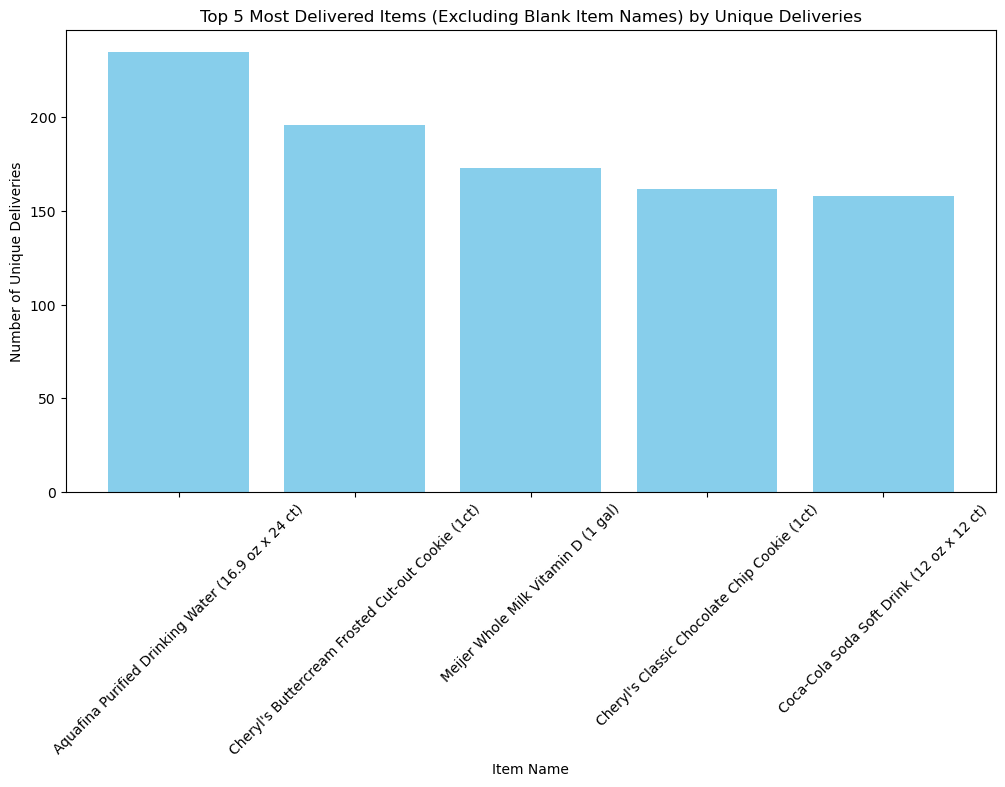

In [174]:
ddData = ddData[ddData['ITEM_NAME'].notnull()]

# Group the data by 'ITEM_NAME' and count the number of unique deliveries for each item
item_unique_delivery_counts = ddData.groupby('ITEM_NAME')['DELIVERY_UUID'].nunique().reset_index()
item_unique_delivery_counts.columns = ['ITEM_NAME', 'Unique_Delivery_Count']

# Sort the items by the number of unique deliveries in descending order
item_unique_delivery_counts = item_unique_delivery_counts.sort_values(by='Unique_Delivery_Count', ascending=False)

# Select the top 5 items
top_5_items = item_unique_delivery_counts.head(5)

# Create the visualization (e.g., a bar plot)
plt.figure(figsize=(12, 6))
plt.bar(top_5_items['ITEM_NAME'], top_5_items['Unique_Delivery_Count'], color='skyblue')
plt.xlabel('Item Name')
plt.ylabel('Number of Unique Deliveries')
plt.title('Top 5 Most Delivered Items (Excluding Blank Item Names) by Unique Deliveries')
plt.xticks(rotation=45)
plt.show()

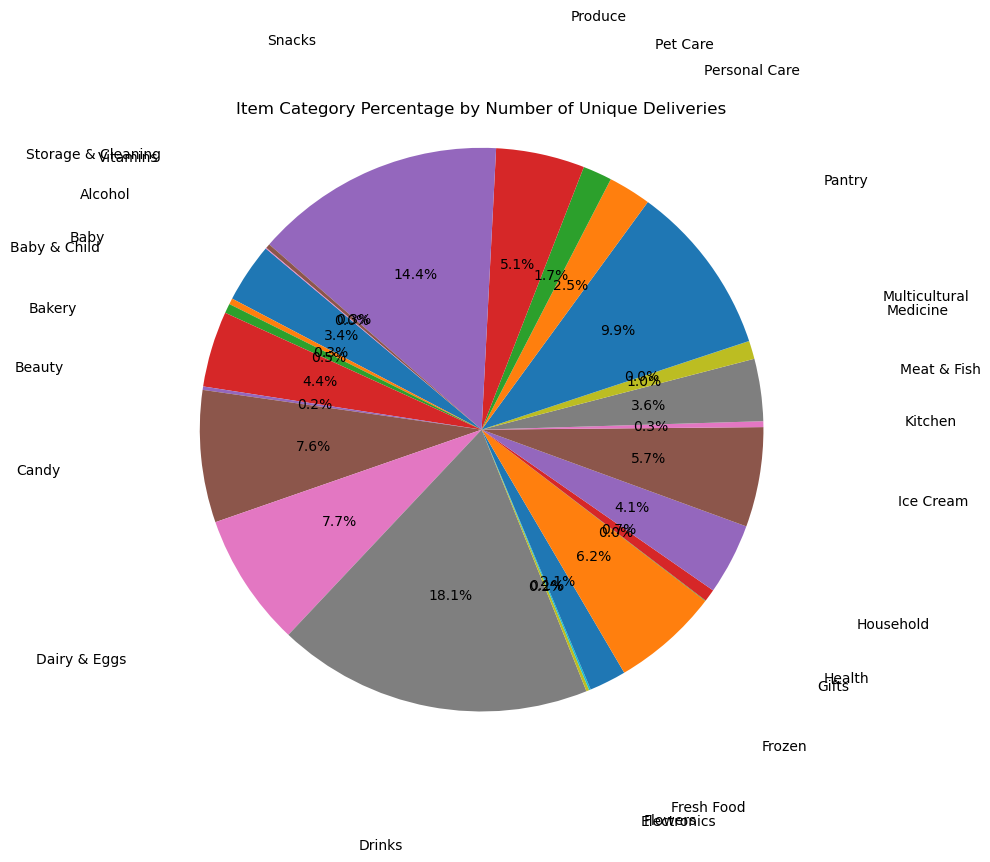

In [234]:
#Item category by unique deliveries
category_unique_delivery_counts = ddData.groupby('ITEM_CATEGORY')['DELIVERY_UUID'].nunique()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_unique_delivery_counts, labels=category_unique_delivery_counts.index, autopct='%1.1f%%', startangle=140,\
        labeldistance=1.5)
plt.axis('equal')  
plt.title('Item Category Percentage by Number of Unique Deliveries')
plt.show()

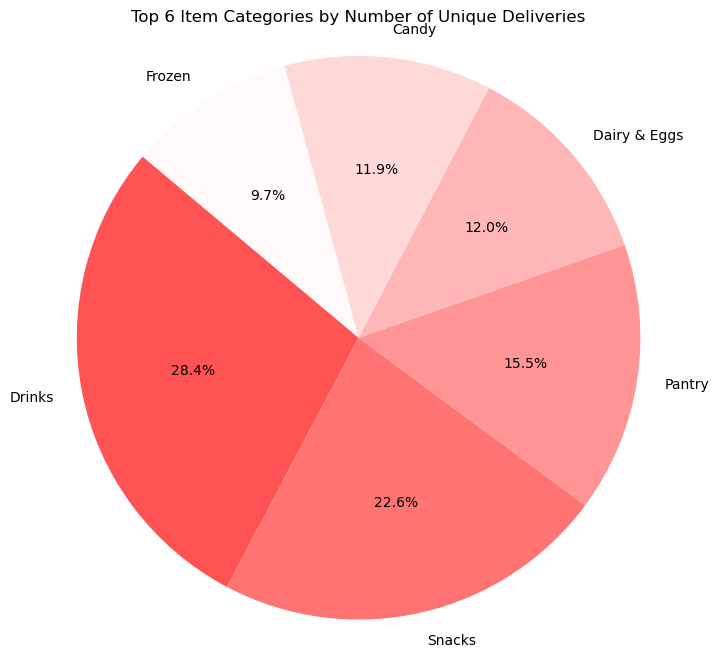

In [230]:
#top 6 Item categories
category_unique_delivery_counts = ddData.groupby('ITEM_CATEGORY')['DELIVERY_UUID'].nunique()

# Sort the categories by the number of unique deliveries in descending order
sorted_categories = category_unique_delivery_counts.sort_values(ascending=False)

# Select the top 6 categories
top_6_categories = sorted_categories.head(6)

# Create a pie chart
plt.figure(figsize=(8, 8))
colors = ['#FF5252', '#FF7373', '#FF9595', '#FFB6B6', '#FFD8D8', '#FFF9F9']
plt.pie(top_6_categories, labels=top_6_categories.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.axis('equal')  
plt.title('Top 6 Item Categories by Number of Unique Deliveries')
plt.show()

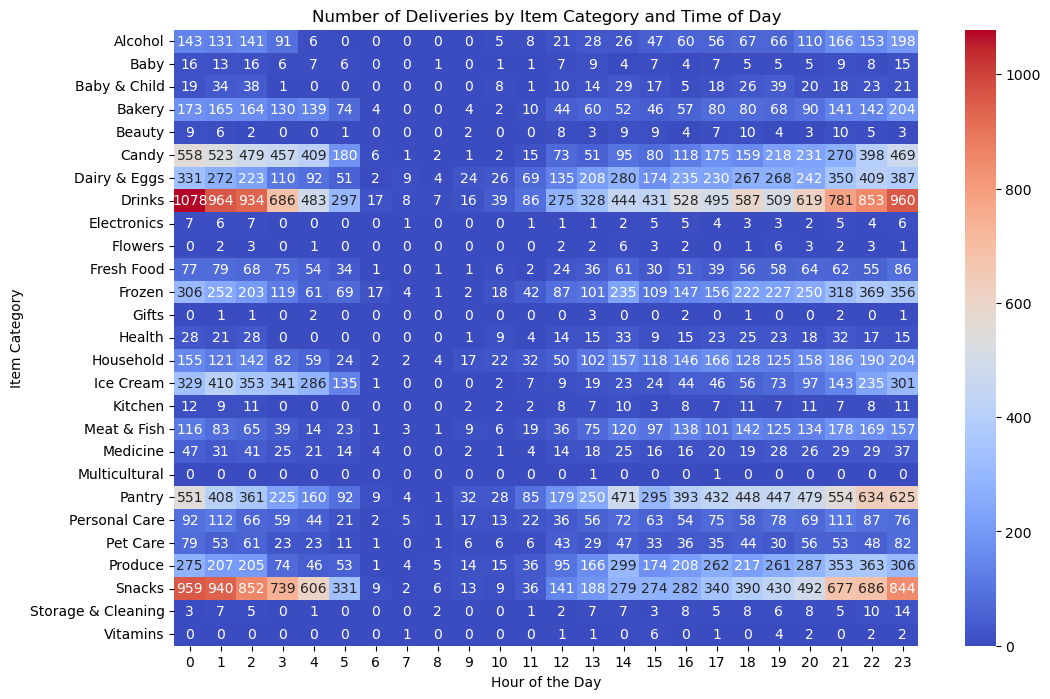

In [183]:
#Num of Deliveries by Item Cat and Hour
ddData['Hour'] = ddData['DELIV_CREATED_AT'].dt.hour

# Group the data by 'ITEM_CATEGORY' and the hour of the day, and count the number of deliveries
delivery_counts = ddData.groupby(['ITEM_CATEGORY', 'Hour']).size().unstack(fill_value=0)


plt.figure(figsize=(12, 8))
sns.heatmap(delivery_counts, cmap='coolwarm', annot=True, fmt='d', cbar=True)
plt.xlabel('Hour of the Day')
plt.ylabel('Item Category')
plt.title('Number of Deliveries by Item Category and Time of Day')
plt.show()

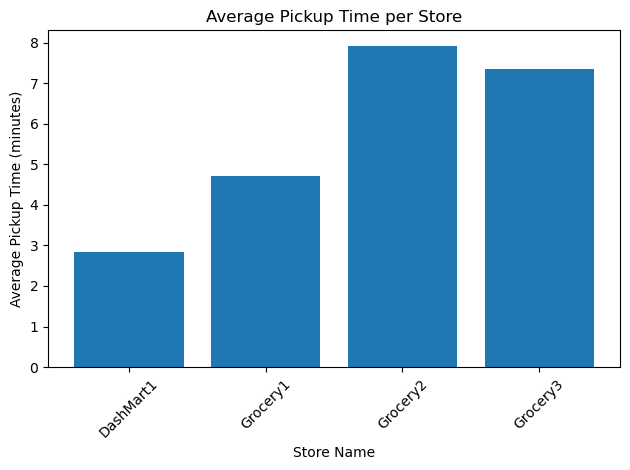

In [221]:
ddData['DELIV_D2R'] = ddData['DELIV_D2R'].fillna(0)
ddData['DELIV_D2R'] = pd.to_numeric(ddData['DELIV_D2R'], errors='coerce')


average_pickup_time_per_store = ddData.groupby('DELIV_STORE_NAME')['DELIV_D2R'].mean().reset_index()
#plt.figure(figsize=(10, 6))
plt.bar(average_pickup_time_per_store['DELIV_STORE_NAME'], average_pickup_time_per_store['DELIV_D2R'])
plt.title('Average Pickup Time per Store')
plt.xlabel('Store Name')
plt.ylabel('Average Pickup Time (minutes)')
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

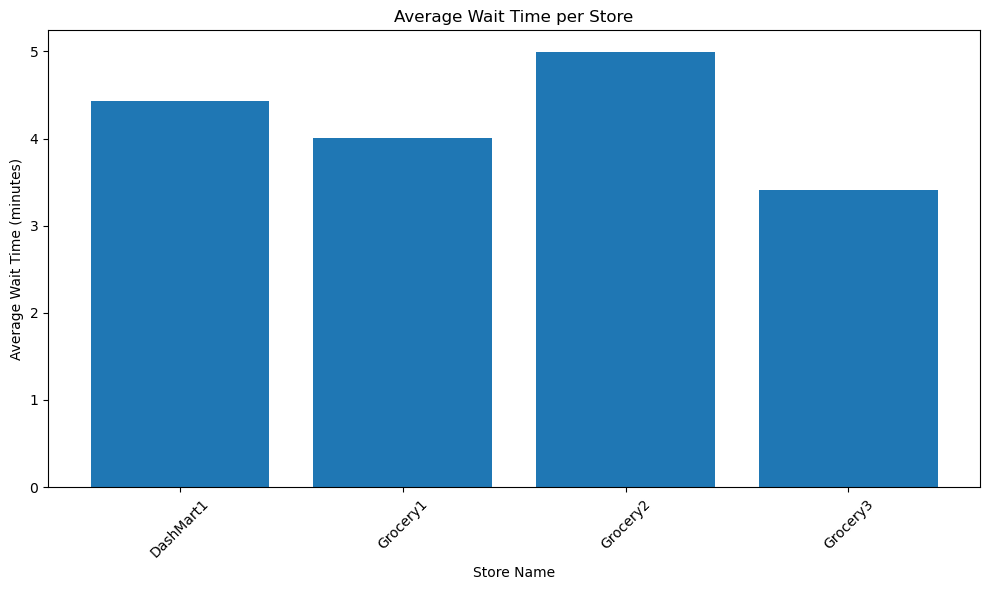

In [216]:
average_wait_time_per_store = ddData.groupby('DELIV_STORE_NAME')['DELIV_CLAT'].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(average_wait_time_per_store['DELIV_STORE_NAME'], average_wait_time_per_store['DELIV_CLAT'])
plt.title('Average Wait Time per Store')
plt.xlabel('Store Name')
plt.ylabel('Average Wait Time (minutes)')
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

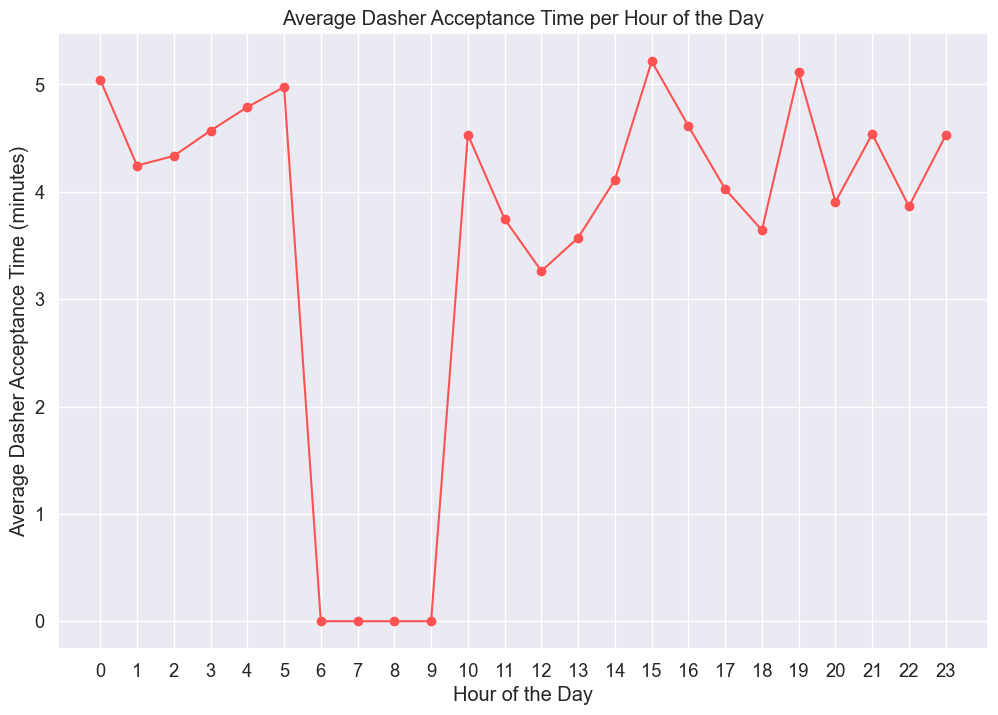

In [258]:
ddData['DELIV_CLAT'] = ddData['DELIV_CLAT'].fillna(0)
ddData['DELIV_CLAT'] = pd.to_numeric(ddData['DELIV_CLAT'], errors='coerce')
ddData['DELIV_CLAT'].head(5)


ddData['Hour'] = ddData['DELIV_CREATED_AT'].dt.hour
average_wait_time_per_hour = ddData.groupby('Hour')['DELIV_CLAT'].mean().reset_index()
plt.figure(figsize=(12, 8))
plt.plot(average_wait_time_per_hour['Hour'], average_wait_time_per_hour['DELIV_CLAT'], marker='o', color='#FF5252',linestyle='-')
plt.title('Average Dasher Acceptance Time per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Dasher Acceptance Time (minutes)')
plt.grid(True)
plt.xticks(range(24))
plt.show()



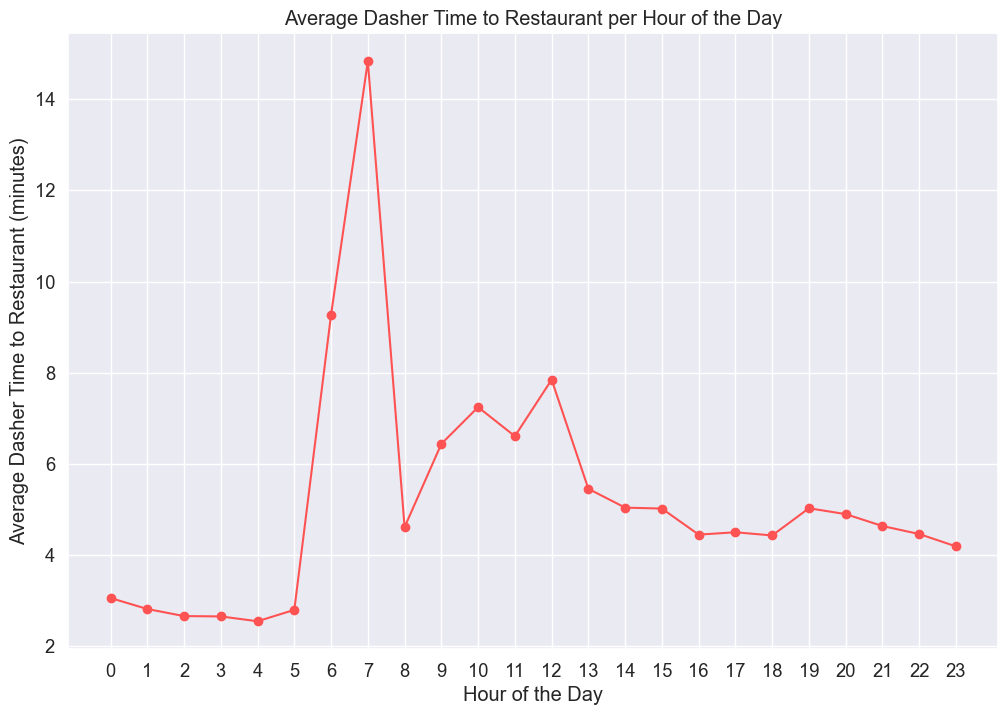

In [259]:
ddData['DELIV_D2R'] = ddData['DELIV_D2R'].fillna(0)
ddData['DELIV_D2R'] = pd.to_numeric(ddData['DELIV_D2R'], errors='coerce')


ddData['Hour'] = ddData['DELIV_CREATED_AT'].dt.hour
average_wait_time_per_hour = ddData.groupby('Hour')['DELIV_D2R'].mean().reset_index()
plt.figure(figsize=(12, 8))
plt.plot(average_wait_time_per_hour['Hour'], average_wait_time_per_hour['DELIV_D2R'], marker='o', color='#FF5252',linestyle='-')
plt.title('Average Dasher Time to Restaurant per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Dasher Time to Restaurant (minutes)')
plt.grid(True)
plt.xticks(range(24))
plt.show()

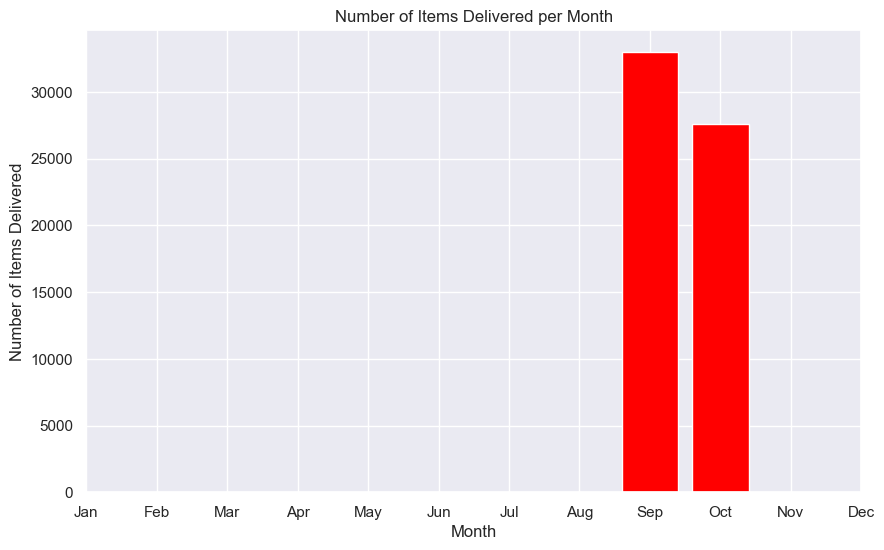

In [311]:
#ITEMS Delivered per month
ddData['Month'] = ddData['DELIV_CREATED_AT'].dt.month
# Group the data by 'ITEM_NAME', month, and year, and count deliveries
items_per_month = ddData.groupby('Month')['ITEM_NAME'].count().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(items_per_month['Month'], items_per_month['ITEM_NAME'], color='red')
plt.xlabel('Month')
plt.ylabel('Number of Items Delivered')
plt.title('Number of Items Delivered per Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

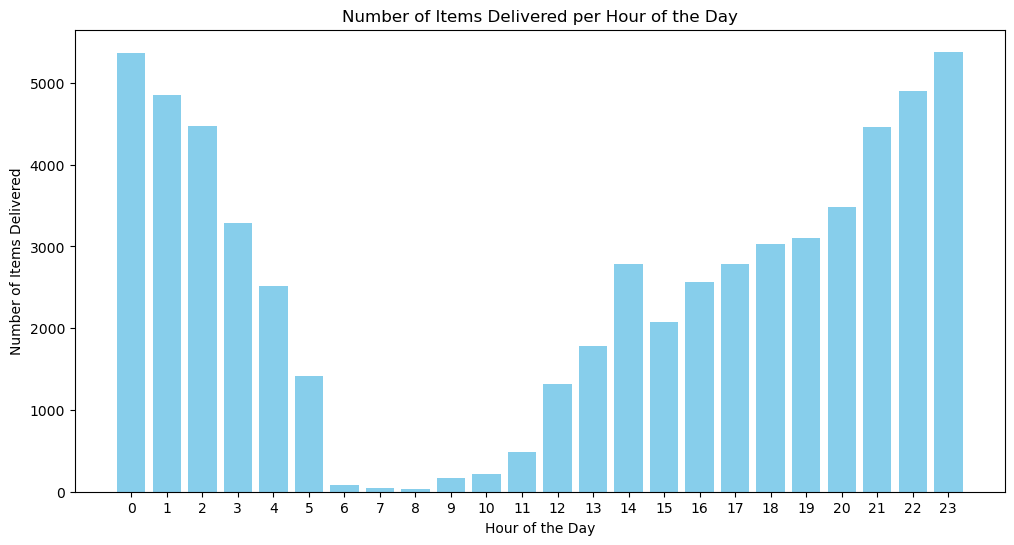

In [163]:
ddData['Hour'] = ddData['DELIV_CREATED_AT'].dt.hour

# Group the data by hour and count the number of items delivered
items_per_hour = ddData.groupby('Hour')['ITEM_NAME'].count().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(items_per_hour['Hour'], items_per_hour['ITEM_NAME'], color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Items Delivered')
plt.title('Number of Items Delivered per Hour of the Day')
plt.xticks(range(24))
plt.show()